# Salinla Charintara (UID: 706092622)

In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data

,FedFunds,Unemployment,HousingStarts,Inflation
1947-01-01,NaN,NaN,NaN,21.480
1947-02-01,NaN,NaN,NaN,21.620
1947-03-01,NaN,NaN,NaN,22.000
1947-04-01,NaN,NaN,NaN,22.000
1947-05-01,NaN,NaN,NaN,21.950
...,...,...,...,...
2023-08-01,5.33,3.8,1305.0,306.269
2023-09-01,5.33,3.8,1356.0,307.481
2023-10-01,5.33,3.8,1359.0,307.619
2023-11-01,5.33,3.7,1560.0,307.917


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [5]:
# Define the split ratio
split_1 = int(len(data) * 0.6)
split_2 = int(len(data) * 0.9)

In [6]:
# Split the data
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [7]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [8]:
# Add Constants
#Func = sm.add_constant

X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out)
X_hold = sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [9]:
X_in = X_in.dropna()
y_in = y_in[X_in.index]

In [10]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [11]:
import matplotlib.pyplot as plt

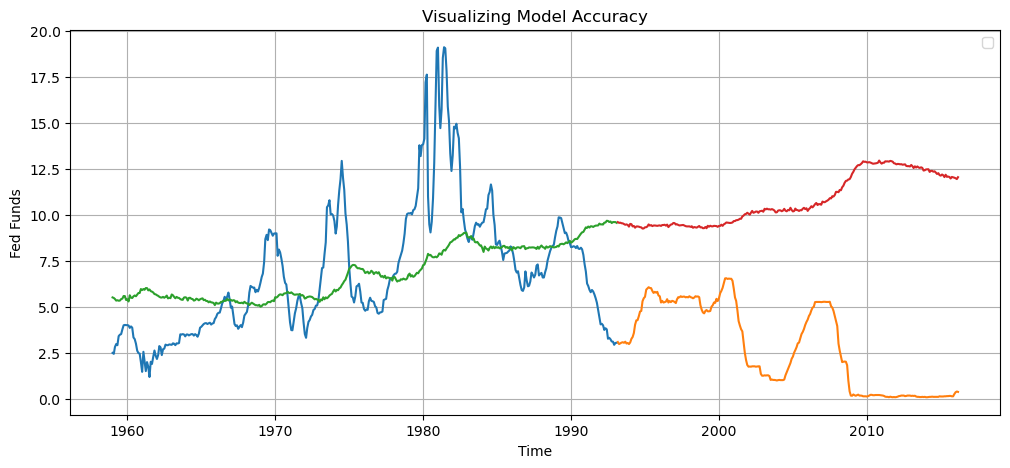

In [12]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
in_mse_1 = mean_squared_error(model1.predict(X_in), y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out), y_out)

In [15]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  9.846446896123076
Outsample MSE :  75.92359646902462


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Degree 1 - In-sample MSE: 1.7519, Out-sample MSE: 75.9236


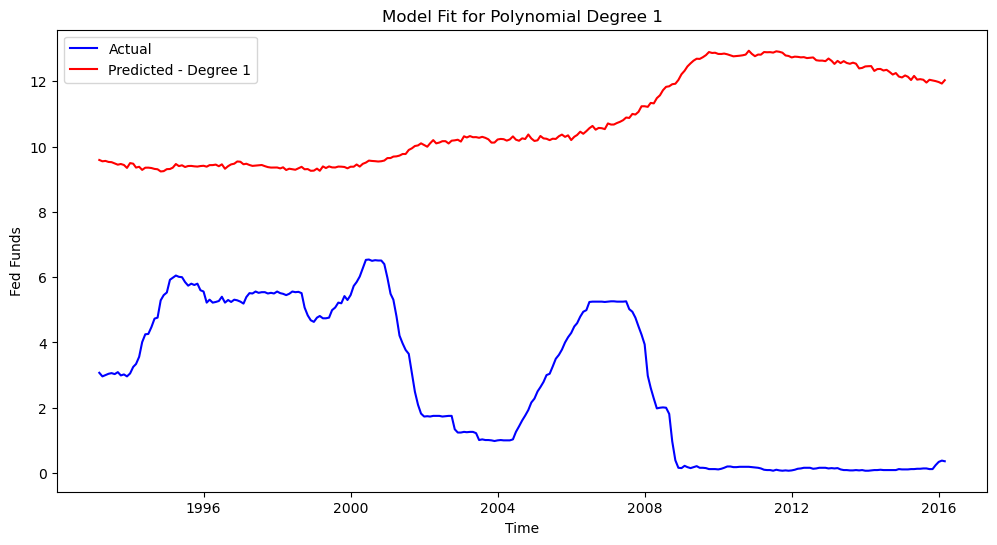

Degree 2 - In-sample MSE: 1.7519, Out-sample MSE: 1475.9835


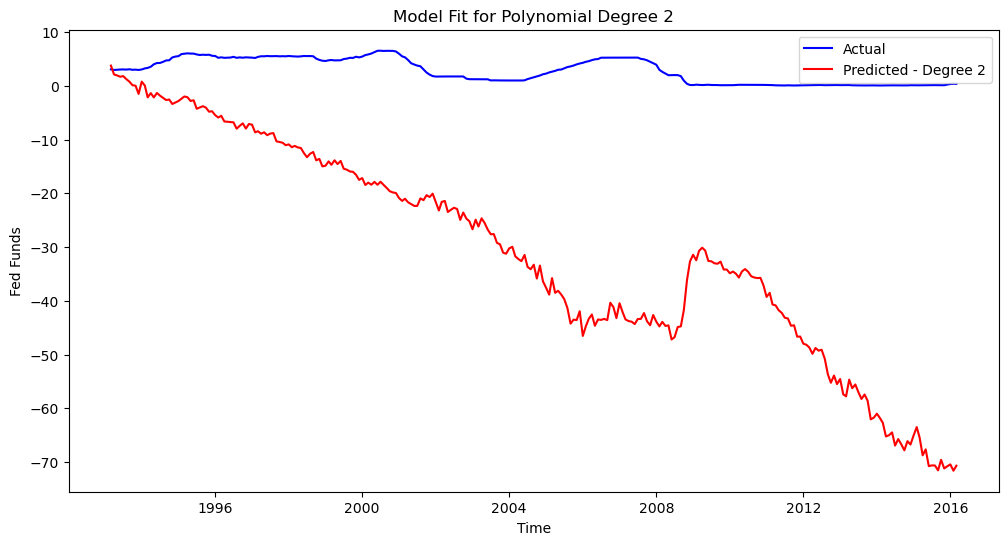

Degree 3 - In-sample MSE: 1.7519, Out-sample MSE: 1439.9133


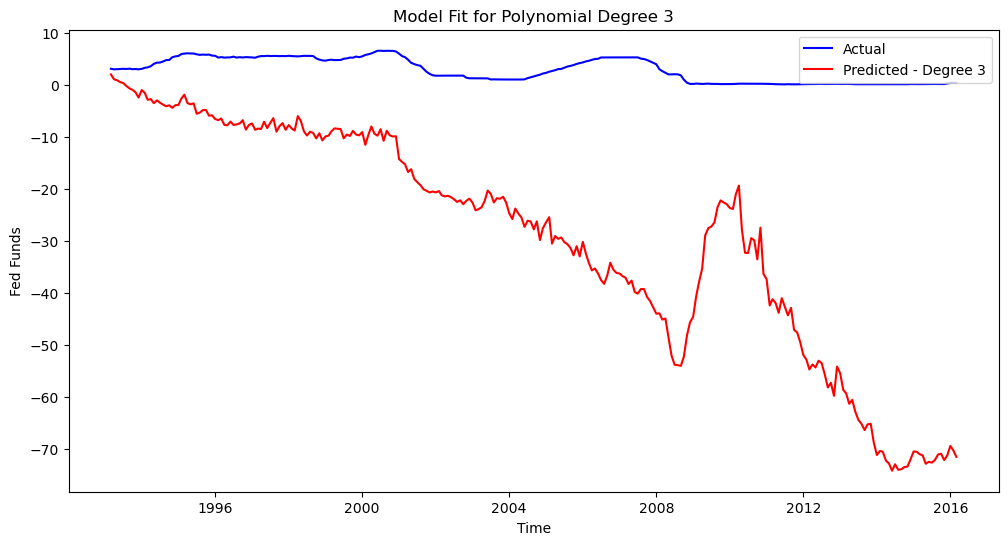

In [32]:
for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    X_in_poly_with_const = sm.add_constant(X_in_poly)
    X_out_poly_with_const = sm.add_constant(X_out_poly)


    model = sm.OLS(y_in, X_in_poly_with_const).fit()
    predictions_out = model.predict(X_out_poly_with_const)

    mse_in = mean_squared_error(y_in, predictions_in)
    mse_out = mean_squared_error(y_out, predictions_out)
    print(f"Degree {degree} - In-sample MSE: {mse_in:.4f}, Out-sample MSE: {mse_out:.4f}")
    
    plt.figure(figsize=(12, 6))
    plt.plot(y_out.index, y_out, label='Actual', color='blue')
    plt.plot(y_out.index, predictions_out, label=f'Predicted - Degree {degree}', color='red')
    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title(f"Model Fit for Polynomial Degree {degree}")
    plt.legend()
    plt.show()


# 7.) State your observations :

From the graph, the higher-degree polynomial might appear to give a better fit on the training data since lower-degree polynomials have high bias but low variance, leading to better generalization. Higher-degree polynomials have low bias but high variance, leading to overfitting. 